## Partial Differential Equation Uses in Aging Population Predition

The ageing population in any countries is a challenge. Many countries in the world are facing this unavoidable social problem. Ageing population occurs when the median age of a country grows caused by the higher life expectancy and decline in the birth rate or/and fertility rate. 
According to data from World Population Prospects: the 2015 Revision (UN, 2015), the total number of those aged 60 years or over persons who are defined as the older person has grown recently in most countries, and this development is projected to be higher in the coming years.



### Modeling population

To implement appropriate policy to decrease ageing population, the current situation of this part of people should be consider. However, as we can imagine, any people at any age may go on to next age safely or die. Also some women at certain age can give birth to a baby. So, setting up a appropriate mathematical model about ageing population seem to be complicated. 

Here we use the McKendrick PDE to simulate the population model:

$$ \frac{\partial p(t,x)}{\partial t} + \frac{\partial p(t,x)}{\partial x} = -d(t,x)p(t,a) $$

$$ t = t_0 : p = p_0(x) $$

$$ x = 0 : p(t,0) = b(t) $$

In this partial differential equation, $p(t,x)$ represents the distribution of at time $t$ and age $x$, $d(t,x)$ is the fertility rate of those people whose age is $x$, and $b(t)$ is the birth rate in a ragion at time $t$.

## Problem set up

Let’s use this model to simulate the population development in the U.S. from 2006 to 2016. We assume that the highest age in this model is 99. According to the data from United Nations Population Division, we assume that the death rate is 0.008,  and the birth rate is 0.013




In [44]:
%matplotlib inline
import numpy 
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

Here, we use time-forward space-backward scheme to solve the problem. Then we can re-write the equation as: 

\begin{equation}\frac{p_i^{n+1}-p_i^n}{\Delta t} +  \frac{p_i^n - p_{i-1}^n}{\Delta x} = -dp_i^n, \end{equation}

We solve for this unknown as follows:

$$ p_i^{n+1} = (1 - d\Delta t - \frac{\Delta t}{\Delta x}) p_i^n + \frac{\Delta t}{\Delta x} p_i^{n-1} $$

In this model, we have boundary condition which is: 

$$ x = 0 : p(t,0) = b(t) $$



Because we choose 2006 as the first year of the model, so the initial condition will be the population distribution in the U.S.by age in 2006(numbers in thousands).

Here, we divide the population into 13 group according to the chart. 

![population_2006](population2006b.png)


In [73]:
nx = 101  
dx = 100/(nx-1)

nt = 20    
dt = 0.5  

d = 0.008
b = 0.013

x = numpy.linspace(0,100,nx)

In [74]:
#initial condition
p = numpy.ones(nx)

p[:4] = 20363/5
p[5:9] = 19629/5
p[10:14] = 20651/5
p[15:19] = 20916/5
p[20:24] = 20393/5
p[25:29] = 20138/5
p[30:34] = 19343/5
p[35:44] = 43121/10
p[45:54] = 42797/10
p[55:64] = 30981/10
p[65:74] = 16554/10
p[75:84] = 12962/10
p[85:] = 3989/15

### Boundary condition

In this problem, we should consider the boundary condition. That is, in every time step, the amount of people whose age is zero--called new baby--is equal to the number of total in last time step times the birth rate.

Because we assume the birth rate is a constant, so the boundary is a dirichlet boundary condition:

$$ x = 0 : p(t,0) = bp_{total}(t-1) $$

In [76]:
def population(p, b, d):
    """Computes populatoin density

    Parameters
    ----------
    p : popualtion density of the first year
    b : birth rate
    d : death rate 
    Returns
    -------
    p: 
        popualtion density of the last year
    """
    for n in range(1, nt):  
        pn = p.copy() 
        p[2:] = (1 - d - dt/dx)*pn[2:] + (dt/dx)*pn[1:-1] 
    
        amount = numpy.sum(p)
        p[0] = amount*b
    
    return p   

In [77]:
p_2016 = population(p, b, d)

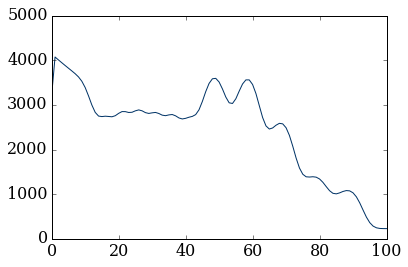

In [78]:
pyplot.plot(x, p_2016, color='#003366', ls='-', lw=1)
pyplot.ylim(0,5000);

### Comparsion 

Let's compare this result to the actual population density in 2016



In [90]:
z = numpy.linspace(0,100,101)
p_2016a = numpy.ones(101)

p_2016a[:4] = 20201/5
p_2016a[5:9] = 16348/5
p_2016a[10:14] = 17677/5
p_2016a[15:19] = 17040/5
p_2016a[20:24] = 16585/5
p_2016a[25:29] = 18101/5
p_2016a[30:34] = 18962/5
p_2016a[35:44] = 40071/10
p_2016a[45:54] = 43007/10
p_2016a[55:64] = 36482/10
p_2016a[65:74] = 21713/10
p_2016a[75:84] = 13061/10
p_2016a[85:] = 7493/15

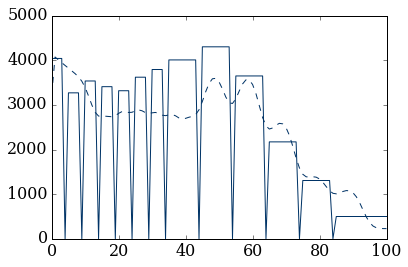

In [91]:
pyplot.plot(z, p_2016a, color='#003366', ls='-', lw=1)
pyplot.plot(x, p_2016, color='#003366', ls='--', lw=1)
pyplot.ylim(0,5000);

From the figure we can find that this model do well at the age older than 50 and has error which cannot be ignored at age younger than 50. Because, we choose death rate and birth rate as a constant to make the calculatoin easier, and it is hard to get the actual death rate as a functoin of age. However, according to the data, we can find the death rate in young person is lower than that in older person. That will cause the error. Same things alos happen at the old age. The actual population density at this part is lower since the actual death rate is higher the the value we assumed.



## Reference

Misra, Jagadis Chandra, ed. Biomathematics: Modelling and simulation. World Scientific, 2006.[Read on Google books, page 437-438](https://books.google.com/books?id=U05hDQAAQBAJ&pg=PA437&lpg=PA437&dq=density+function+of+population+age&source=bl&ots=3RkkMcyS_V&sig=jYsJcOvhAsEQKnxQKVF4WG05JRA&hl=zh-CN&sa=X&ved=0ahUKEwj9sKiqyPHQAhUTlpAKHVfjBXEQ6AEIXDAI#v=onepage&q=density%20function%20of%20population%20age&f=false)

Keyfitz, Barbara Lee, and Nathan Keyfitz. "The McKendrick partial differential equation and its uses in epidemiology and population study." Mathematical and Computer Modelling 26.6 (1997): 1-9.

Death rate,( 1 ) United Nations Population Division. World Population Prospects, ( 2 ) Census reports and other statistical publications from national statistical offices, ( 3 ) Eurostat: Demographic Statistics, ( 4 ) United Nations Statistical Division. Population and Vital Statistics Reprot ( various years ), ( 5 ) U.S. Census Bureau: International Database, and ( 6 ) Secretariat of the Pacific Community: Statistics and Demography Programme.[Here](http://data.worldbank.org/indicator/SP.DYN.CDRT.IN?end=2014&locations=US&name_desc=true&start=2006&view=chart)

Age and Sex Composition in the United States: 2006,United States Census Bureau.[Here](https://www.census.gov/population/age/data/2006comp.html)

Birth rate in the United States from 1990 to 2014[Here](https://www.statista.com/statistics/195943/birth-rate-in-the-united-states-since-1990/)
